In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [5]:
path = Path.cwd().parent.parent
filePath = str(path) + "/data_process/train_processing/train_data_occupancy.parquet"
df = pd.read_parquet(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 748 entries, 2007-12-13 to 2010-01-15
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   guest_count  748 non-null    int64
dtypes: int64(1)
memory usage: 11.7 KB


In [42]:
train = df.iloc[36:-130]
test = df.iloc[-130:-100]
print(train.shape)
print(test.shape)

(582, 1)
(30, 1)


Text(0.5, 1.0, 'train')

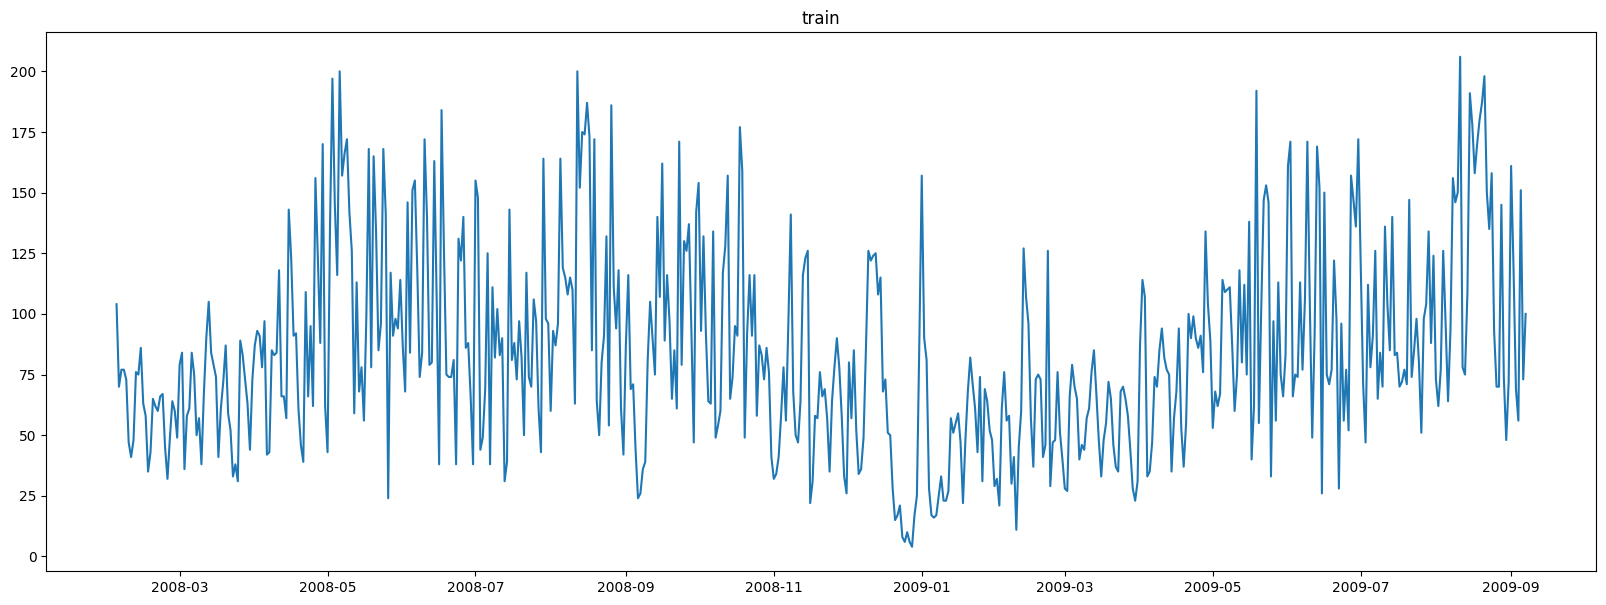

In [43]:
plt.figure(figsize=(20, 7))
plt.plot(train.index,train["guest_count"])
plt.title("train")

Text(0.5, 1.0, 'test')

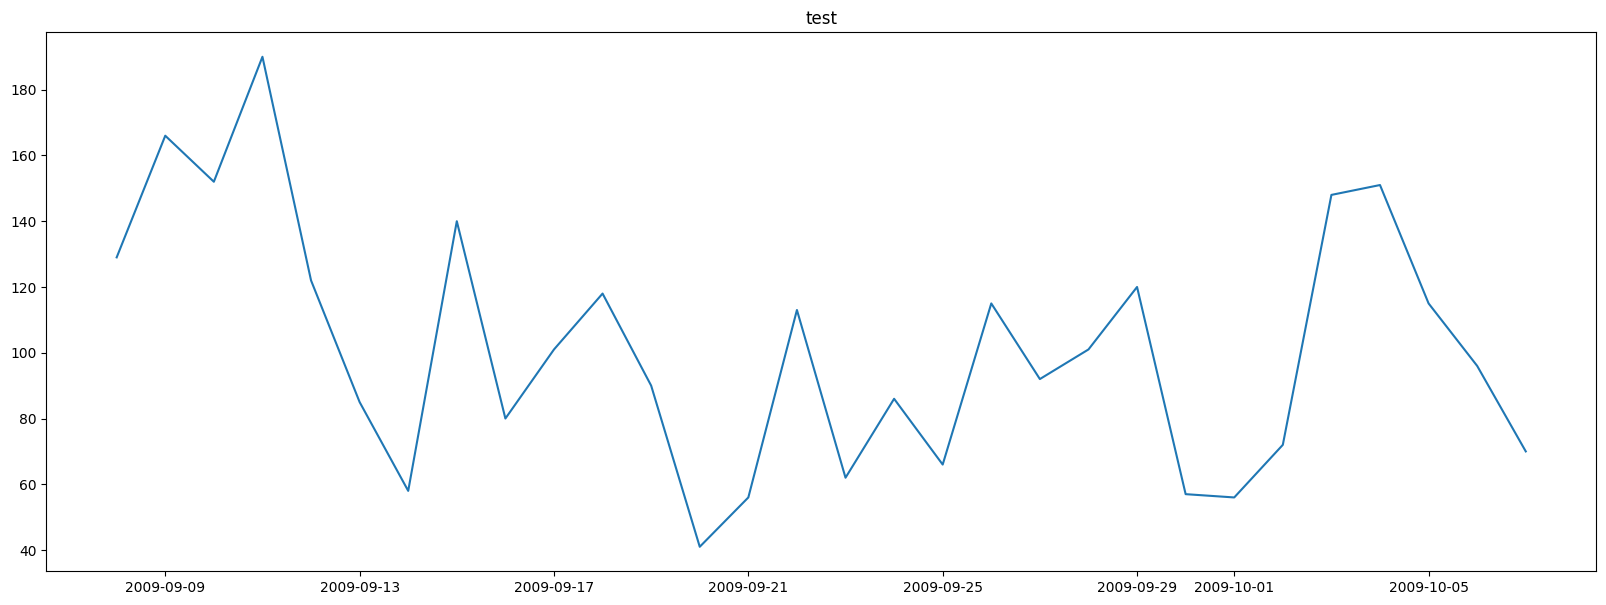

In [44]:
plt.figure(figsize=(20, 7))
plt.plot(test.index,test["guest_count"])
plt.title("test")

In [45]:
result = adfuller(train["guest_count"])
# Ispis rezultata
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretacija rezultata
if result[1] < 0.05:
    print("\nSerija je stacionarna.")
else:
    print("\nSerija nije stacionarna i treba je diferencirati")

ADF Statistic: -3.3543572362142626
p-value: 0.01261679367416106
Critical Values:
   1%: -3.441935806025943
   5%: -2.8666509204896093
   10%: -2.5694919649816947

Serija je stacionarna.


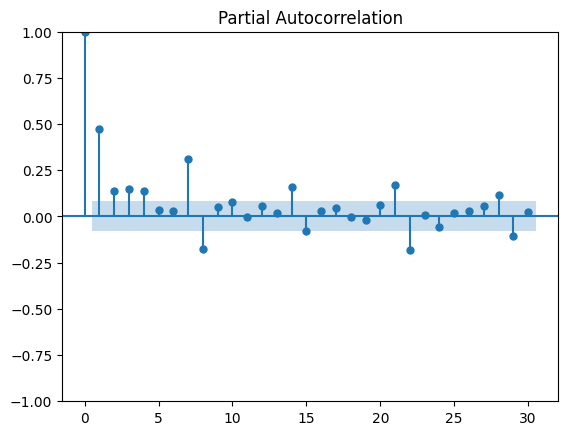

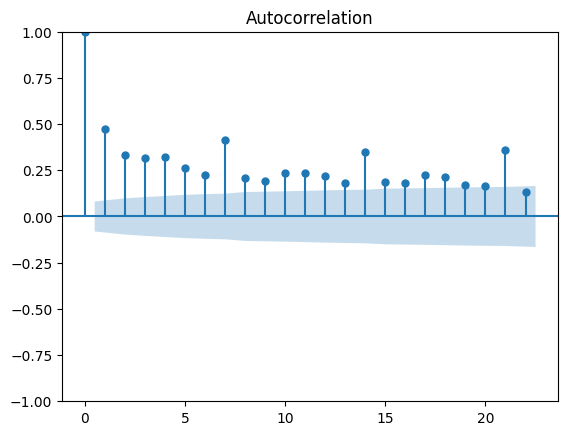

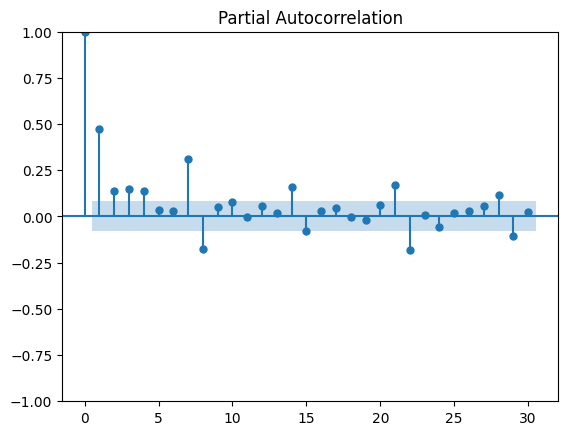

In [75]:
plot_acf(train["guest_count"], lags = 22)
plot_pacf(train["guest_count"], lags = 30)

In [81]:
model = auto_arima(train["guest_count"], seasonal = True, trace = True, approx = False, m = 7)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=5657.629, Time=2.18 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5999.678, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5853.676, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5790.222, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5997.678, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=5743.574, Time=1.33 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=5727.493, Time=1.78 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=5659.610, Time=7.80 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=5659.591, Time=7.76 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=5781.272, Time=1.34 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=5736.798, Time=2.38 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=5712.065, Time=1.76 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=inf, Time=5.68 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=5655.655, Time=2.46 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  582
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -2821.048
Date:                           Tue, 12 Mar 2024   AIC                           5652.096
Time:                                   21:56:44   BIC                           5673.920
Sample:                               02-04-2008   HQIC                          5660.604
                                    - 09-07-2009                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4495      0.036     12.349      0.000       0.378       0.521
ma.L1         -0.9772      0.009   -106.129      0.000      -0.995      -0.959
ar.S.L7        0.9464      0.018     52.580      0.000       0.911       0.982
ma.S.L7       -0.7743      0.041    -19.020      0.000      -0.854      -0.695
sigma2       958.0482     51.297     18.676      0.000     857.507    1058.589
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                11.91
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.13
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
mod = ARIMA(train["guest_count"], order = (6,0,1), seasonal_order = (5,0,2,7) )
mod = mod.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          guest_count   No. Observations:                  582
Model:             ARIMA(6, 0, 1)x(5, 0, [1, 2], 7)   Log Likelihood               -2816.052
Date:                              Tue, 12 Mar 2024   AIC                           5664.105
Time:                                      22:08:00   BIC                           5733.968
Sample:                                  02-04-2008   HQIC                          5691.338
                                       - 09-07-2009                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.3744     13.206      6.389      0.000      58.491     110.257
ar.L1          0.1211      3.309      0.037      0.971      -6.365       6.607
ar.L2          0.1682      1.523      0.110      0.912      -2.817       3.153
ar.L3          0.0315      0.055      0.569      0.569      -0.077       0.140
ar.L4          0.1131      0.097      1.167      0.243      -0.077       0.303
ar.L5          0.0429      0.343      0.125      0.901      -0.630       0.716
ar.L6         -0.0314      0.048     -0.654      0.513      -0.125       0.063
ma.L1          0.3409      3.306      0.103      0.918      -6.138       6.820
ar.S.L7        0.2635     12.096      0.022      0.983     -23.444      23.971
ar.S.L14       0.3288      9.256      0.036      0.972     -17.812      18.470
ar.S.L21       0.1293      0.571      0.226      0.821      -0.990       1.249
ar.S.L28       0.1048      1.843      0.057      0.955      -3.508       3.717
ar.S.L35       0.0186      0.346      0.054      0.957      -0.659       0.696
ma.S.L7       -0.0956     12.088     -0.008      0.994     -23.787      23.596
ma.S.L14      -0.2913      7.223     -0.040      0.968     -14.448      13.866
sigma2       926.3584     54.288     17.064      0.000     819.955    1032.762
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.95
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.23
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

582 611


<Axes: >

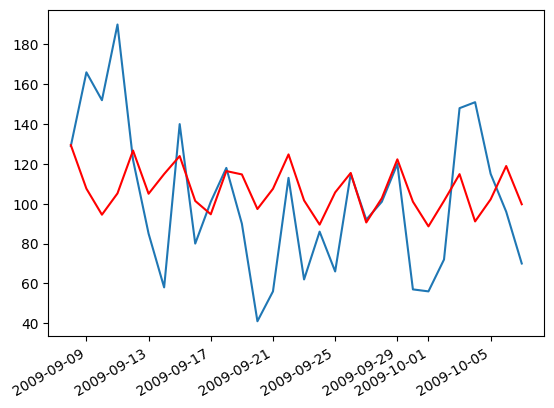

In [83]:
start = len(train)
end = len(test) + len(train) - 1
 
print(start,end)
pred = mod.predict(start = start, end = end)

plt.plot(test.index, test["guest_count"])
pred.plot(color = "red")